# MAT 381E Homework 2

## Question 1

For this question we are going to use [an NBA dataset](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). 

1. Get the data from the season 2018-2019 as a pandas dataframe. Explain each column in the dataset.
2. Write a function that takes the `GAME_ID` as the parameter and returns the full dataset for a given match. Test your function on 5 random matches.
3. Write a function that takes the `GAME_ID` as the parameter and returns a dictionary of (key,value) pairs where key is a player name and value is how many times that specific player appears in `PLAYER1_NAME`,`PLAYER2_NAME`, or `PLAYER3_NAME` columns.
4. Plot the results of Step 3 as a bar chart sorted from the most active player to the least active player for 5 random games.
3. Write a function that takes the `GAME_ID` as the parameter and returns a list of pairs of player names where the pair interacted during the game more than once. Test your function on 5 random matches.

## ANSWER for Q1

I am going to post the answer later next week after the due date of a related question I asked in MAT 388E.

## Question 2

For this question we are going to use [a sample](https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json) from [Spottify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

1. Ingest the data as a python dictionary using the [json](https://docs.python.org/3/library/json.html) library.
2. Construct a complete list of all artists appearing in the dictionary you obtained in step 1. Then using [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function count how many times each artist appears.
3. Filter out those artists that appear fewer than 100 times, and then sort the remaining from the most popular to least popular.
4. Plot the result you obtain from Step 3 as a bar chart.
5. Repeat Steps 2-4 for the Songs instead of Artists by filtering out the songs that appear 25 times or fewer.

## ANSWER for Q2

In [1]:
import json
import requests
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
with requests.get('https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json') as url:
    raw = url.content
playlists = json.loads(raw.decode('utf8'))

In [3]:
artists = []
for playlist in playlists['playlists']:
    for song in playlist['tracks']:
        artists.append(song['artist_name'])
counts = Counter(artists)
counts

Counter({'Missy Elliott': 52,
         'Britney Spears': 88,
         'Beyoncé': 234,
         'Justin Timberlake': 116,
         'Shaggy': 52,
         'Usher': 184,
         'The Pussycat Dolls': 23,
         "Destiny's Child": 49,
         'OutKast': 80,
         'Nelly Furtado': 27,
         'Jesse McCartney': 23,
         'Cassie': 7,
         'Omarion': 30,
         'Avril Lavigne': 60,
         'Chris Brown': 259,
         'Sheryl Crow': 12,
         'The Black Eyed Peas': 80,
         'Bowling For Soup': 19,
         'The Click Five': 4,
         'Jonas Brothers': 38,
         'Lil Mama': 8,
         'Cascada': 15,
         'Jason Derulo': 150,
         'Ne-Yo': 86,
         'Miley Cyrus': 145,
         'Boys Like Girls': 22,
         'Iyaz': 21,
         'Kesha': 74,
         'Justin Bieber': 251,
         'M.I.A.': 21,
         'The Killers': 55,
         'blink-182': 57,
         'The All-American Rejects': 29,
         'Vanessa Carlton': 17,
         'Cris Cab': 2,
        

In [4]:
filtered = dict(sorted([x for x in counts.items() if x[1]>99], key = lambda x: x[1], reverse=True))
filtered

{'Drake': 939,
 'Kanye West': 415,
 'Kendrick Lamar': 385,
 'Rihanna': 350,
 'Eminem': 332,
 'The Weeknd': 296,
 'Lil Uzi Vert': 292,
 'Ed Sheeran': 285,
 'Future': 265,
 'Chris Brown': 259,
 'Justin Bieber': 251,
 'Lil Wayne': 242,
 'Beyoncé': 234,
 'The Chainsmokers': 232,
 'Twenty One Pilots': 226,
 'Big Sean': 222,
 'Post Malone': 221,
 'J. Cole': 220,
 'Kenny Chesney': 204,
 'Maroon 5': 203,
 'Luke Bryan': 199,
 'John Mayer': 193,
 'Usher': 184,
 'Rae Sremmurd': 182,
 'Pearl Jam': 182,
 'Florida Georgia Line': 181,
 'G-Eazy': 180,
 'Nicki Minaj': 179,
 'Bruno Mars': 177,
 'JAY Z': 174,
 'Coldplay': 171,
 'Calvin Harris': 169,
 'Jason Aldean': 168,
 'Migos': 165,
 'Zac Brown Band': 165,
 'Imagine Dragons': 163,
 'Childish Gambino': 157,
 'DJ Khaled': 155,
 'Tegan and Sara': 151,
 'Jason Derulo': 150,
 'Wiz Khalifa': 148,
 'George Strait': 146,
 'Miley Cyrus': 145,
 'Ariana Grande': 145,
 '2Pac': 142,
 'Travis Scott': 139,
 'Fetty Wap': 139,
 'A$AP Rocky': 139,
 'Lana Del Rey': 136,

<BarContainer object of 96 artists>

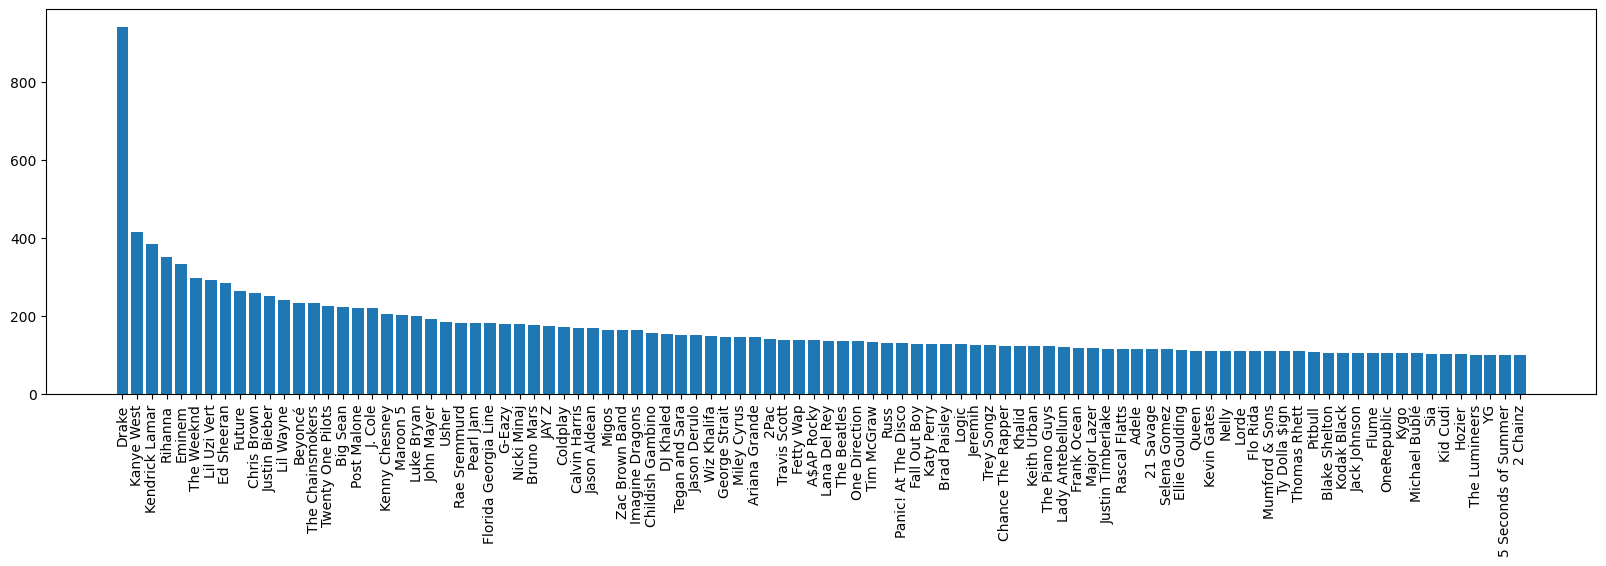

In [5]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(filtered.keys(),filtered.values())

<BarContainer object of 110 artists>

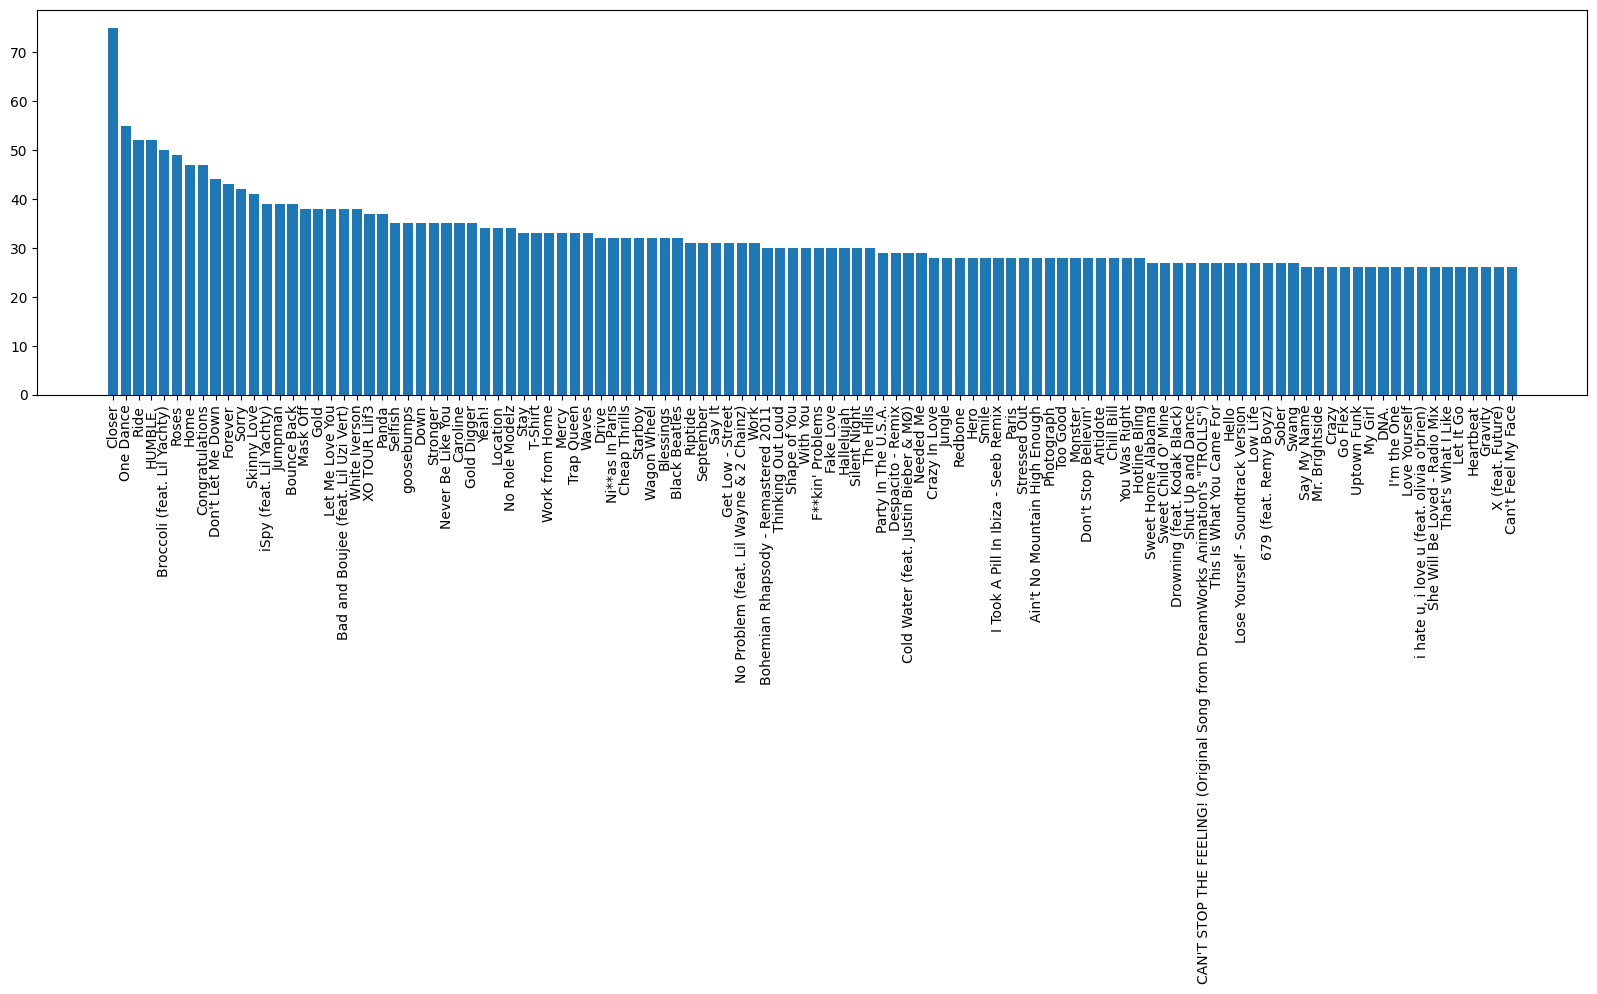

In [6]:
songs = []
for playlist in playlists['playlists']:
    for song in playlist['tracks']:
        songs.append(song['track_name'])
counts = Counter(songs)
filtered = dict(sorted([x for x in counts.items() if x[1]>25], key = lambda x: x[1], reverse=True))
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(filtered.keys(),filtered.values())

## Question 3

For this question we are going to use [Wordbank Data](https://data.worldbank.org/). I would suggest [wbgapi](https://pypi.org/project/wbgapi/) library.

1. Write a function that takes a country name and a list of indicators and returns a pandas data frame with the corresponding data.
2. Get the data for Turkey for the following indicators:
   * [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
   * [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
   * [Labor force participation rate, female (% of female population ages 15+) (SL.TLF.CACT.FE.NE.ZS)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.NE.ZS)
   * [Mortality rate, under-5 (per 1,000 live births) (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)
   * [Literacy rate, adult female (% of females ages 15 and above) (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
3. Write a function that draws a line plot for a given list of indicators against time (i.e. the x-axis will be the time) AFTER it drops the years where data is not available. Draw a line plot for Turkey for all of the indicators I listed above.
4. Write a function that takes two indicators `id1` and `id2` and does a scatter plot of `id1` against `id2` after it drops the years where data is not available for one of the indicators. Your plot must have labels on the x- and the y-axes to indicate which indicators were used. Then draw a scatter plot (10 in total) for every pair of indicators I listed above.

## ANSWER for Q3

In [7]:
import wbgapi as wb
import matplotlib.pyplot as plt

In [8]:
def getData(country,indices):
    return wb.data.DataFrame(indices,economy=country)

In [9]:
data = getData('TUR',['SI.POV.NAHC','SH.XPD.CHEX.PC.CD','SL.TLF.CACT.FE.NE.ZS','SH.DYN.MORT','SE.ADT.LITR.FE.ZS'])
data

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
series,,,,,,,,,,,,,,,,,,,,,
SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.604523,92.138077,92.401817,92.645813,93.563011,93.498268,NaN,94.424042,NaN,NaN
SH.DYN.MORT,257.000000,249.3,241.4,233.5,225.7,218.30,211.3,204.9,198.8,192.9,...,15.800000,14.700000,13.800000,13.000000,12.100000,11.400000,10.700000,10.100000,9.50,NaN
SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,524.250305,551.401245,525.844727,453.116486,466.794800,442.617615,389.865570,396.466827,NaN,NaN
SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.000000,15.000000,14.700000,14.300000,13.500000,13.900000,14.400000,15.000000,NaN,NaN
SL.TLF.CACT.FE.NE.ZS,65.440002,NaN,NaN,NaN,NaN,56.68,NaN,NaN,NaN,NaN,...,29.040001,30.299999,30.240000,31.410000,32.419998,33.529999,34.119999,34.310001,30.84,NaN


In [10]:
data = data.T.dropna()
data

series,SE.ADT.LITR.FE.ZS,SH.DYN.MORT,SH.XPD.CHEX.PC.CD,SI.POV.NAHC,SL.TLF.CACT.FE.NE.ZS
YR2005,80.548950,26.2,364.908051,18.6,23.290001
YR2006,80.385162,24.3,416.928528,16.3,23.070000
YR2007,81.263832,22.5,512.848267,16.7,23.139999
YR2009,85.347160,19.5,500.193054,16.9,25.520000
YR2010,88.073174,18.1,539.327148,16.1,27.110001
YR2011,90.310097,16.9,531.418579,16.3,28.410000
YR2012,91.604523,15.8,524.250305,15.0,29.040001
YR2013,92.138077,14.7,551.401245,15.0,30.299999
YR2014,92.401817,13.8,525.844727,14.7,30.240000
YR2015,92.645813,13.0,453.116486,14.3,31.410000


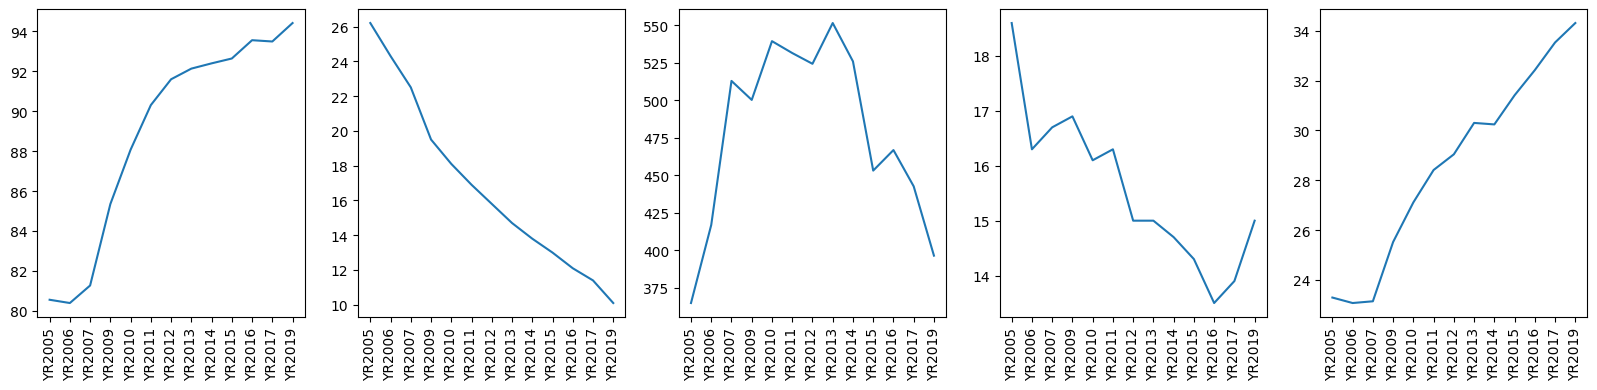

In [11]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
    
for i,x in enumerate(data.columns):
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].plot(data.index,data[x])

In [12]:
def scatter(data,indx1,indx2,ax):
    xs = data[indx1]
    ys = data[indx2]
    ax.scatter(xs,ys,alpha=0.5)
    ax.set(xlabel=indx1,ylabel=indx2)

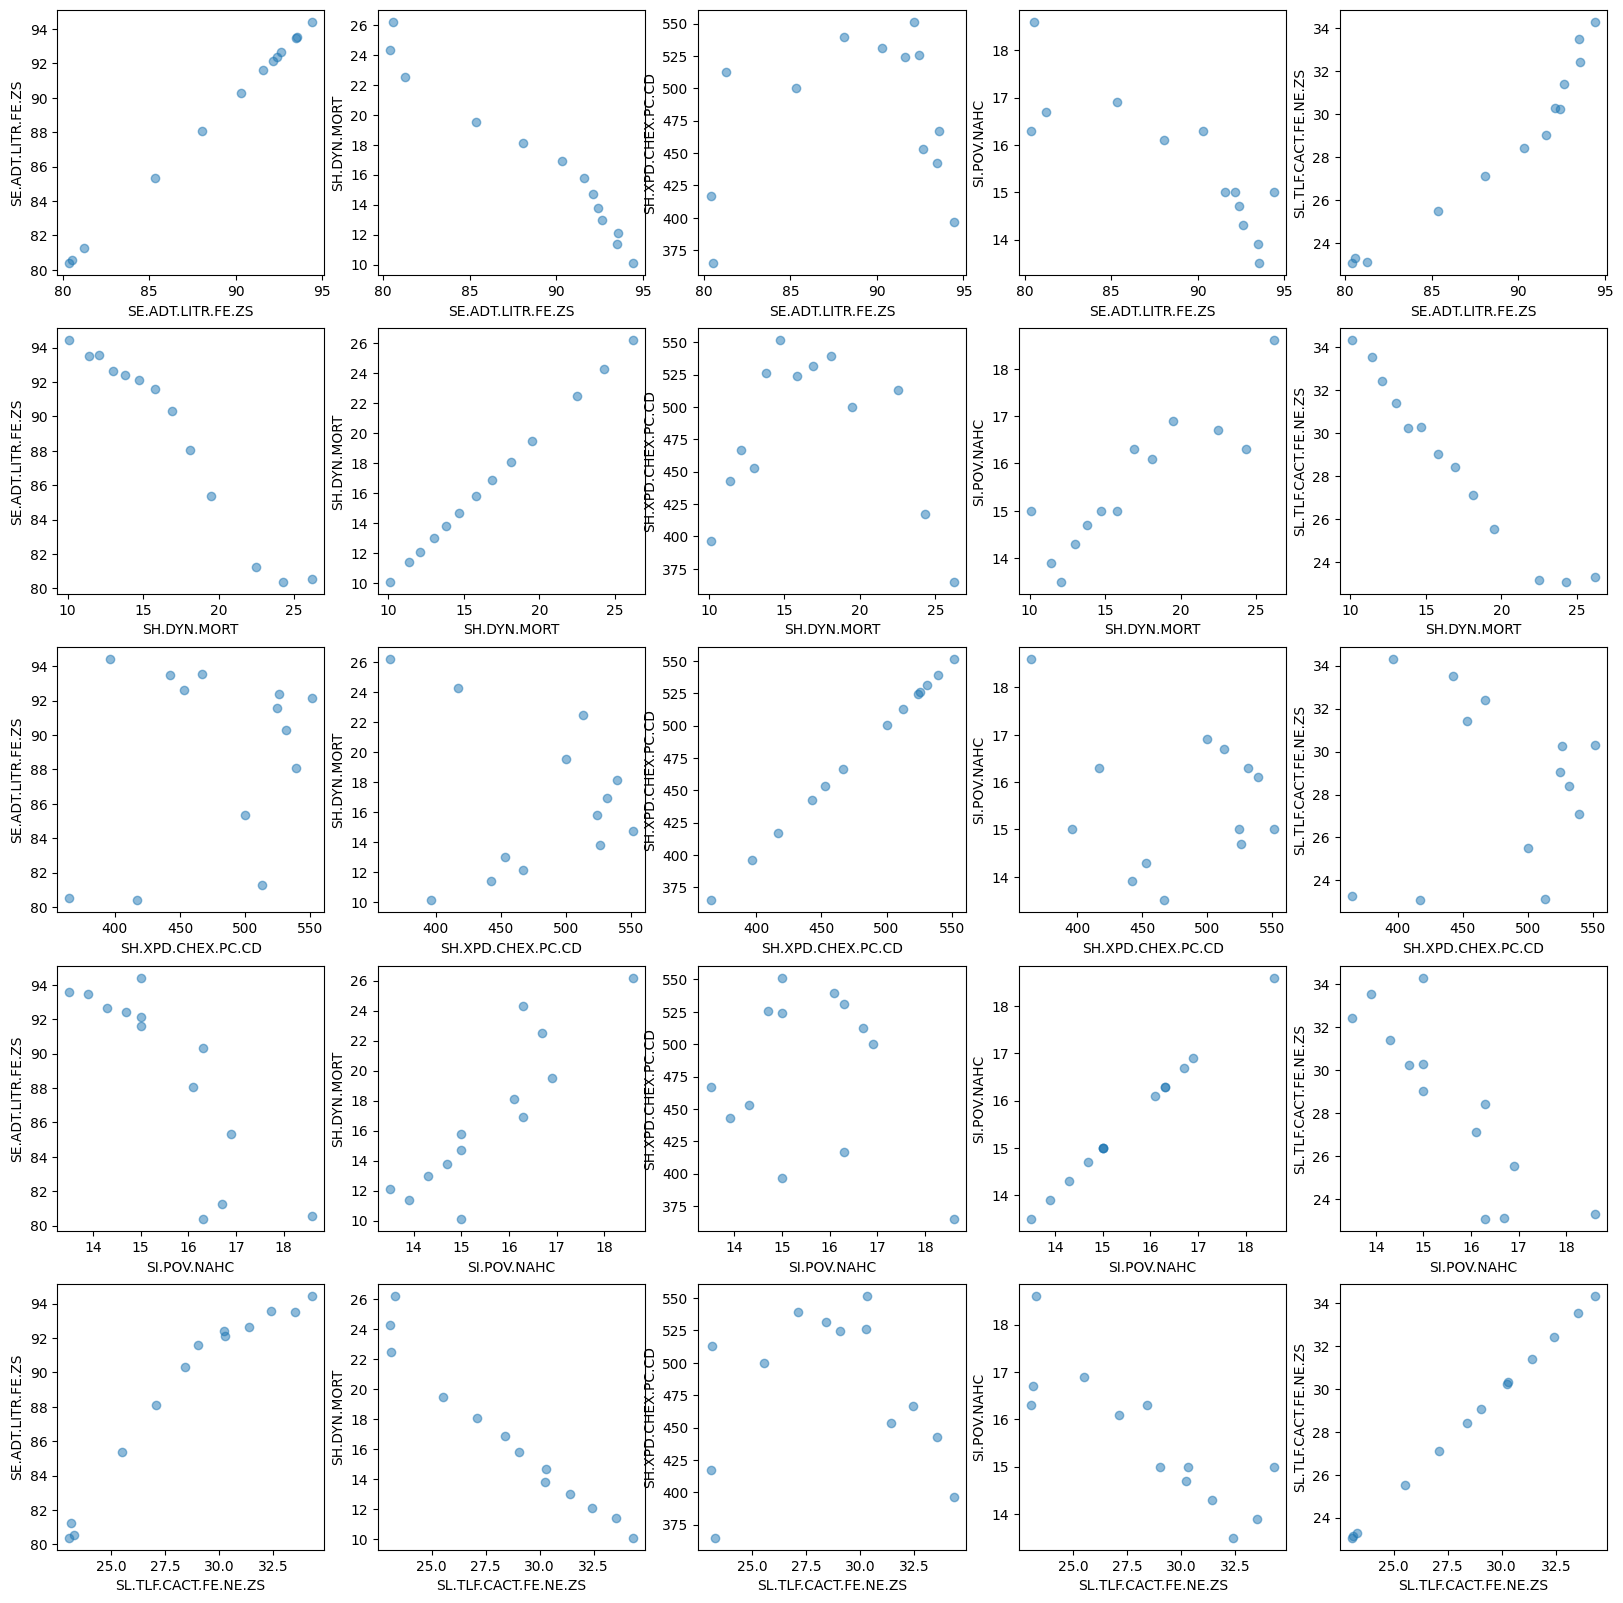

In [13]:
indices = data.columns
N = len(indices)

fig,ax = plt.subplots(5,5,figsize=(20,20))

for i in range(N):
    for j in range(N):
        scatter(data,indices[i],indices[j],ax[i,j])